In [1]:
import ares
import numpy as np
import matplotlib.pyplot as pl
import distpy

In [109]:
data = ares.analysis.GalaxyPopulation() #for lit values

#could add sources so only those used to fit are considered
def getMasses(redshifts):
    data = ares.analysis.GalaxyPopulation()

    Ms = []
    for z in redshifts:
        data_info = data.compile_data(z, quantity='smf')

        # print(data_info)

        mass = []
        for i in data_info:
    #         mass.append(data_info[i]["M"][~data_info[i]["M"].mask])
            mass.extend(data_info[i]["M"].compressed())

        Ms.extend(mass)

    Ms = list(set(Ms))
    Ms = np.sort(Ms)
    return Ms

In [110]:
# Independent variables
# redshifts = np.array([0.35, 0.875, 1.125, 1.75, 2.25, 2.75])
redshifts = np.sort(np.array([0.35, 0.875, 1.125, 1.75, 2.25, 2.75, 1.65, 2.5, 3.5, 0.10165, 0.25, 0.45, 0.575, 0.725, 0.9]))

# redshifts = np.array([4, 5, 6, 7, 8])

# [0.10165, 0.25, 0.35, 0.45, 0.575, 0.725, 0.9][1.65, 2.5, 3.5]
# Ms = np.logspace(7, 12, 60)
Ms = getMasses(redshifts)

# print(Ms)

# blob 1: the smf
blob_n1 = ['galaxy_smf']
blob_i1 = [('z', redshifts), ('bins', Ms)]
blob_f1 = ['StellarMassFunction']

No z=0.10165 data in song2016.
No z=0.10165 data in stefanon2017.
No z=0.10165 data in duncan2014.
No z=0.10165 data in tomczak2014.
No z=0.10165 data in mortlock2011.
No z=0.10165 data in marchesini2009_10.
No z=0.10165 data in perez2008.
No z=0.25 data in song2016.
No z=0.25 data in stefanon2017.
No z=0.25 data in duncan2014.
No z=0.25 data in tomczak2014.
No z=0.25 data in mortlock2011.
No z=0.25 data in marchesini2009_10.
No z=0.25 data in perez2008.
No z=0.35 data in song2016.
No z=0.35 data in stefanon2017.
No z=0.35 data in duncan2014.
No z=0.35 data in mortlock2011.
No z=0.35 data in marchesini2009_10.
No z=0.35 data in perez2008.
No z=0.45 data in song2016.
No z=0.45 data in stefanon2017.
No z=0.45 data in duncan2014.
No z=0.45 data in tomczak2014.
No z=0.45 data in mortlock2011.
No z=0.45 data in marchesini2009_10.
No z=0.45 data in perez2008.
No z=0.575 data in song2016.
No z=0.575 data in stefanon2017.
No z=0.575 data in duncan2014.
No z=0.575 data in tomczak2014.
No z=0.57

In [111]:
blob_pars = \
{
 'blob_names': [blob_n1],
 'blob_ivars': [blob_i1],
 'blob_funcs': [blob_f1],
 'blob_kwargs': [None],
}

In [112]:
#define the parameters that remain unchanged
base_pars = ares.util.ParameterBundle('emma:model1')
base_pars.update(blob_pars)

# print(base_pars)
# This is important!
# base_pars['pop_calib_lum'] = None

In [113]:
free_pars = \
[
    'pq_func_par0[0]',
    'pq_func_par2[0]', 

    #norm
    'pq_func_par0[1]',
    'pq_func_par2[1]', 

    #gamma
    'pq_func_par0[2]',
    'pq_func_par2[2]', 

    #peak mass
    'pq_func_par0[3]',
    'pq_func_par2[3]', 
]

is_log = [False, False, False, False, False, False, False, False]

from distpy.distribution import UniformDistribution
from distpy.distribution import DistributionSet

ps = DistributionSet()
ps.add_distribution(UniformDistribution(-1, 4), 'pq_func_par0[0]')
ps.add_distribution(UniformDistribution(-1, 1),  'pq_func_par2[0]')

ps.add_distribution(UniformDistribution(0, 2),   'pq_func_par0[1]')
ps.add_distribution(UniformDistribution(-1, 1),  'pq_func_par2[1]')

ps.add_distribution(UniformDistribution(0, .9),   'pq_func_par0[2]')
ps.add_distribution(UniformDistribution(-3, -0.01),  'pq_func_par2[2]')

ps.add_distribution(UniformDistribution(10.0, 14.0),   'pq_func_par0[3]')
ps.add_distribution(UniformDistribution(0, 2),  'pq_func_par2[3]')

In [114]:
#From Moster2010, table 7
# logM_0 = 11.88 #(0.01)
logM_0 = 11.0 #(0.01)

mu = 0.019 #(0.002)
N_0 = 0.0282 #(0.0003)
nu = -0.72 #(0.06)
gamma_0 = 0.556 #0.001
gamma_1 = -0.26 #(0.05)
beta_0 = 1.06 #(0.06)
beta_1 = 0.17 #(0.12)

guesses = \
{
    'pq_func_par0[0]': beta_0,
    'pq_func_par2[0]': beta_1, 

    #norm
    'pq_func_par0[1]': N_0,
    'pq_func_par2[1]': nu, 

    #gamma
    'pq_func_par0[2]': gamma_0,
    'pq_func_par2[2]': gamma_1, 

    #peak mass
    'pq_func_par0[3]': logM_0,
    'pq_func_par2[3]': mu, 
}

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


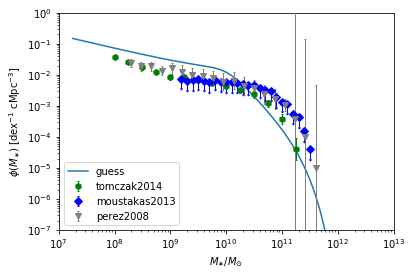

In [115]:
# base_pars
# Ms = np.logspace(7, 12, 60)

base_pars.update(guesses)
pop = ares.populations.GalaxyPopulation(**base_pars)

z = .35

smf = pop.StellarMassFunction(z, Ms)
pl.loglog(Ms, smf, label='guess')
data.PlotSMF(z=z, round_z=0.2)

pl.legend()
pl.show()

In [116]:
# Initialize a fitter object and give it the data to be fit
fitter_smf = ares.inference.FitGalaxyPopulation(**base_pars)

fitter_smf.include.append('smf')

# The data can also be provided more explicitly
#I seem to need this or else the run throws error: Must set data by hand! 
# fitter_lf.redshifts = {‘lf’: [5.9]}
fitter_smf.data = 'tomczak2014',  'mortlock2011', 'moustakas2013', 'marchesini2009_10'
#higher z
# fitter_smf.data = 'song2016', 'stefanon2017', 'duncan2014'

# print(fitter_smf.data)

In [117]:
fitter = ares.inference.ModelFit(**base_pars)
fitter.add_fitter(fitter_smf)

# Establish the object to which we'll pass parameters
from ares.populations.GalaxyHOD import GalaxyHOD
fitter.simulator = GalaxyHOD

In [118]:
# print(fitter.blob_names)
# print(fitter.blob_ivars)
# print(fitter.blob_funcs, fitter.blob_kwargs)


In [120]:
fitter.save_hmf = True  # cache HMF for a speed-up!
fitter.save_psm = True  # cache source SED model (e.g., BPASS, S99)

# Setting this flag to False will make ARES generate new files for each checkpoint.
fitter.checkpoint_append = False

fitter.parameters = free_pars
fitter.is_log = is_log
fitter.prior_set = ps

# In general, the more the merrier (~hundreds)
fitter.nwalkers = 50

# fitter.jitter = [0.001] * len(fitter.parameters)
fitter.jitter = [0.01, 0.01, 0.001, 0.005, 0.01, 0.01, 0.04, 0.01]

fitter.guesses = guesses
# fitter.debug('True')
# fitter.pops
# nwalkers

# Fixing position of walker 5 (parameter pq_func_par2[3])
# Moved from -0.011269793983486896 to 0.047713519167187315
# Fixing position of walker 32 (parameter pq_func_par2[3])
# Moved from -0.0013435535543337776 to 0.011177889519882528


In [121]:
# Run the thing
fitter.run('MCMC_files/test_smfcal_3', burn=6, steps=60, save_freq=4, clobber=True)

Saved HaloMassFunction instance to limit I/O.
# Starting burn-in: Mon Jun 29 14:08:19 2020
# Wrote test_smfcal_3.burn.dd0000.facc.pkl: Mon Jun 29 14:22:27 2020
Writing data one last time because save_freq > steps.
# Wrote test_smfcal_3.burn.dd0001.facc.pkl: Mon Jun 29 14:27:52 2020
# Burn-in complete in 1.17e+03 seconds.
# Starting MCMC: Mon Jun 29 14:27:52 2020
# Wrote test_smfcal_3.dd0000.facc.pkl: Mon Jun 29 14:43:43 2020
# Wrote test_smfcal_3.dd0001.facc.pkl: Mon Jun 29 14:56:53 2020
# Wrote test_smfcal_3.dd0002.facc.pkl: Mon Jun 29 15:07:04 2020
# Wrote test_smfcal_3.dd0003.facc.pkl: Mon Jun 29 15:12:48 2020
# Wrote test_smfcal_3.dd0004.facc.pkl: Mon Jun 29 15:18:36 2020
# Wrote test_smfcal_3.dd0005.facc.pkl: Mon Jun 29 15:24:04 2020
# Wrote test_smfcal_3.dd0006.facc.pkl: Mon Jun 29 15:30:29 2020
# Wrote test_smfcal_3.dd0007.facc.pkl: Mon Jun 29 15:36:21 2020
# Wrote test_smfcal_3.dd0008.facc.pkl: Mon Jun 29 15:41:38 2020
# Wrote test_smfcal_3.dd0009.facc.pkl: Mon Jun 29 15:46:55 

In [148]:
anl = ares.analysis.ModelSet('MCMC_files/test_smfcal_3')
# anl = ares.analysis.ModelSet('MCMC_files/smf_run2')

labels = \
{
    'pq_func_par0[0]': 'beta_0',
    'pq_func_par2[0]': 'beta_1', 

    #norm
    'pq_func_par0[1]': 'N_0',
    'pq_func_par2[1]': 'nu', 

    #gamma
    'pq_func_par0[2]': 'gamma_0',
    'pq_func_par2[2]': 'gamma_1', 

    #peak mass
    'pq_func_par0[3]': 'logM_0',
    'pq_func_par2[3]': 'mu', 
}

anl.custom_labels = labels
# anl.custom_labels


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : MCMC_files/                                                                            ####
#### prefix      : test_smfcal_3                                                                          ####
#### N-d         : 8                                                                                      ####


# Loading MCMC_files/test_smfcal_3.dd*.chain.pkl...
# Loaded MCMC_files/test_smfcal_3.dd*.chain.pkl in 0.11 s.
# Loaded MCMC_files\test_smfcal_3.dd0000.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0001.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0002.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0003.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0004.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0005.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0006.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0007.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0008.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0009.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0010.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0011.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0012.blob_2d.galaxy_smf.pkl
# Loaded MCMC_files\test_smfcal_3.dd0013.blob_2d.galaxy_s

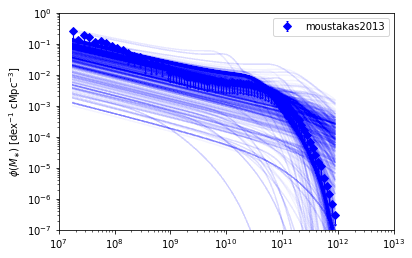

In [149]:
#look at the raw LF samples
# ax = anl.ReconstructedFunction('galaxy_lf', ivar=[6, None], samples='all', color='b', alpha=0.01)

# ax.set_yscale('log')
z = 0.
# 0.35, 0.875, 1.125, 1.75, 2.25, 2.75

gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
gpop.PlotSMF(z, ax=ax, round_z=0.2)

# ax.set_ylim(1e-35, 1)
# ax.set_xlim(1e7, 1e13)

ax.legend()
pl.show()

# ax = anl_2.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)
# gpop.PlotSMF(z, ax=ax, round_z=0.2)

In [150]:
params = \
['pq_func_par0[0]',
    'pq_func_par2[0]', 

    #norm
    'pq_func_par0[1]',
    'pq_func_par2[1]', 

    #gamma
    'pq_func_par0[2]',
    'pq_func_par2[2]', 

    #peak mass
    'pq_func_par0[3]',
    'pq_func_par2[3]' 
]

covar = anl.CovarianceMatrix(params)

if len(covar[0]) == 1:
    print("{}: {}".format(params[0], covar[0][0]))
else:
    for i in range(len(covar[0])):
        print("{}: {:e}".format(params[i], covar[0][i]))

pq_func_par0[0]: 1.060051e+00
pq_func_par2[0]: 2.070576e-01
pq_func_par0[1]: 4.294644e-02
pq_func_par2[1]: -6.797502e-01
pq_func_par0[2]: 4.343161e-01
pq_func_par2[2]: -2.863049e-01
pq_func_par0[3]: 1.187427e+01
pq_func_par2[3]: 2.744835e-01


0 of 3000 chain elements ignored because of chain links with inf's/nan's.


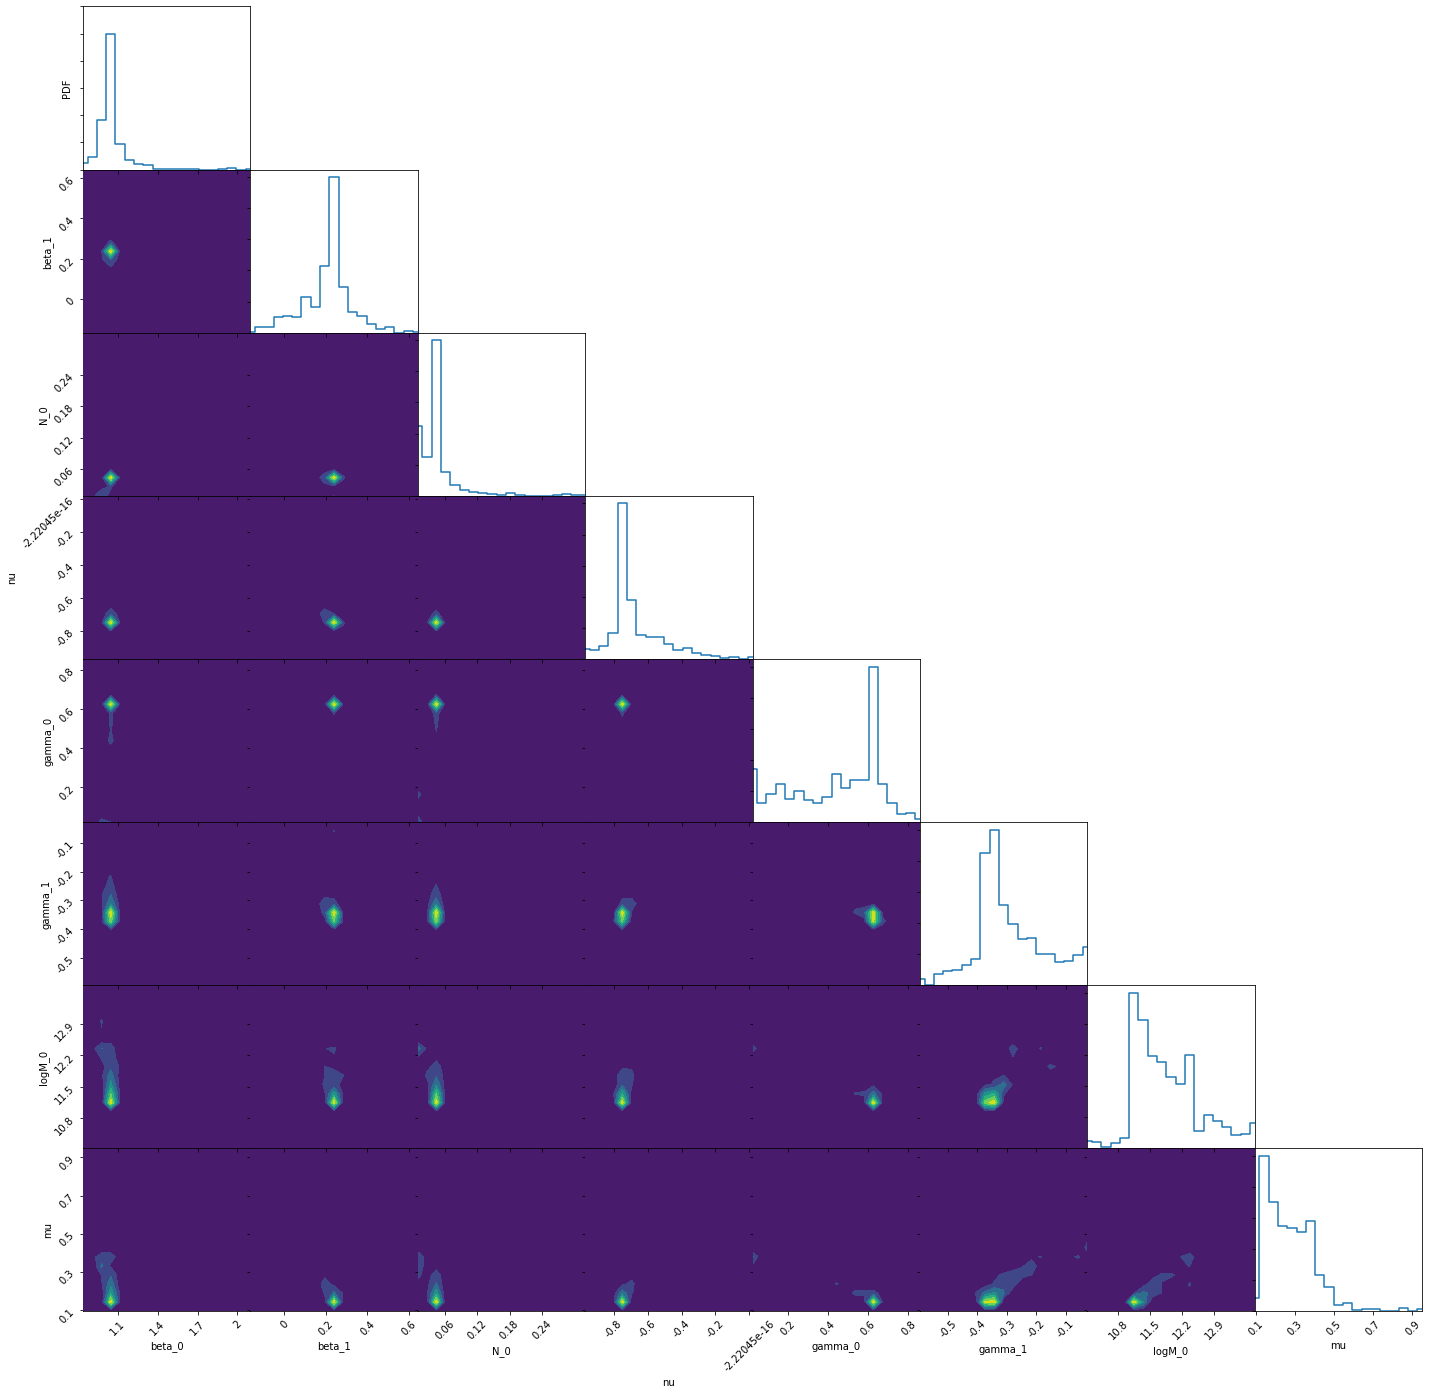

In [151]:

trig = anl.TrianglePlot(pars=params)

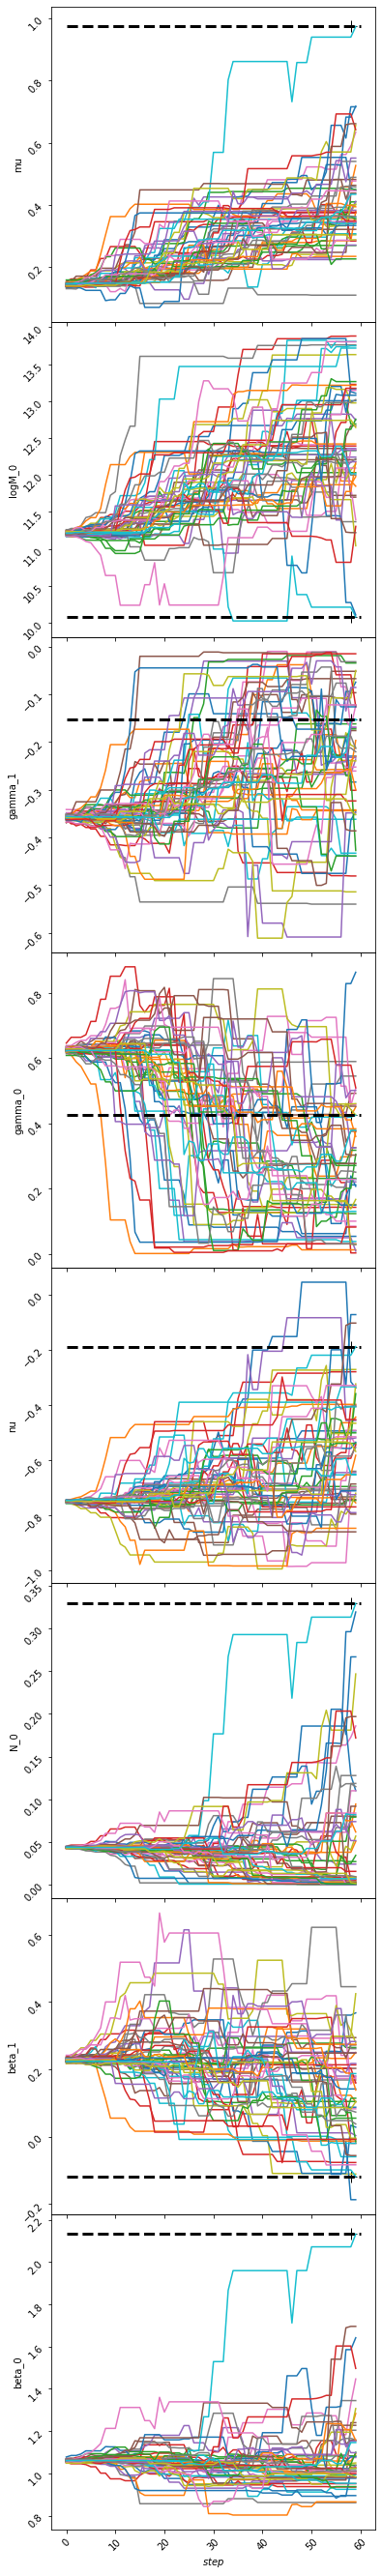

In [152]:
anl.WalkerTrajectoriesMultiPlot(best_fit='mode')
# mode: 2190
# median: -3171602.2183875367

In [153]:
anl.max_likelihood_parameters()

{'pq_func_par0[0]': 2.1318459914688512,
 'pq_func_par2[0]': -0.11814022535864682,
 'pq_func_par0[1]': 0.32974875561176475,
 'pq_func_par2[1]': -0.18829561314751708,
 'pq_func_par0[2]': 0.4250767589779064,
 'pq_func_par2[2]': -0.15208938782337944,
 'pq_func_par0[3]': 10.079534347646995,
 'pq_func_par2[3]': 0.9732405902581454}

In [154]:
covar = anl.CovarianceMatrix(params)

if len(covar[0]) == 1:
    print("{}: {}".format(params[0], covar[0][0]))
else:
    for i in range(len(covar[0])):
        print("{}: {:e}".format(params[i], covar[0][i]))
        
fit_mean = np.array(covar[0])

pq_func_par0[0]: 1.060051e+00
pq_func_par2[0]: 2.070576e-01
pq_func_par0[1]: 4.294644e-02
pq_func_par2[1]: -6.797502e-01
pq_func_par0[2]: 4.343161e-01
pq_func_par2[2]: -2.863049e-01
pq_func_par0[3]: 1.187427e+01
pq_func_par2[3]: 2.744835e-01


In [155]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[params[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch)
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [156]:
fit_best_like = anl.max_likelihood_parameters()

for i in range(len(covar[0])):
    print(anl.get_1d_error(params[i])) #(maximum likelihood value, positive error, negative error).

(2.1318459914688512, array([-1.03992935,  1.14902924]))
(-0.11814022535864682, array([ 0.41244872, -0.21194592]))
(0.32974875561176475, array([-0.27539357,  0.32110622]))
(-0.18829561314751708, array([-0.34387932,  0.58310392]))
(0.4250767589779064, array([0.21058278, 0.28198856]))
(-0.15208938782337944, array([0.00407184, 0.22038651]))
(10.079534347646995, array([ 2.46952766, -1.13326332]))
(0.9732405902581454, array([-0.58768301,  0.82338696]))


# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


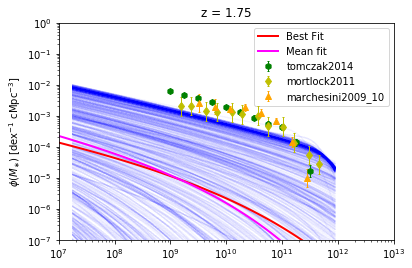

In [157]:
z = 1.75

Ms_short = np.logspace(7, 13, 80)

# print(Ms)

ls_best = pop_best.StellarMassFunction(z, Ms_short)
ls_mean = pop_mean.StellarMassFunction(z, Ms_short)

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# print(ls_best)

obslf = ares.analysis.GalaxyPopulation()
obslf.PlotSMF(z=z, ax=ax, round_z=0.2)

ax.loglog(Ms_short, ls_best, label='Best Fit', color="red", linewidth=2)
pl.loglog(Ms_short, ls_mean, label='Mean fit', color="magenta", linewidth=2)

pl.title("z = %.2f" %z)
pl.legend()
# pl.ylim(1e-18, 1e2)
pl.show()


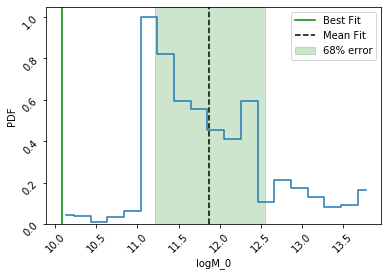

In [159]:
bests = [anl.get_1d_error(i, nu=0.68,  peak='mode') for i in params]

i = 6

ax = anl.PosteriorPDF(pars=params[i])

pl.axvline(x=bests[i][0], ls="-", color="green", label="Best Fit")

ax.axvspan(bests[i][0]-bests[i][1][1], bests[i][0]+bests[i][1][0], alpha=0.2, color='green' ,label="68% error")

pl.axvline(x=fit_mean[i], ls="--", color="black", label="Mean Fit")

pl.legend()
pl.show()